## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


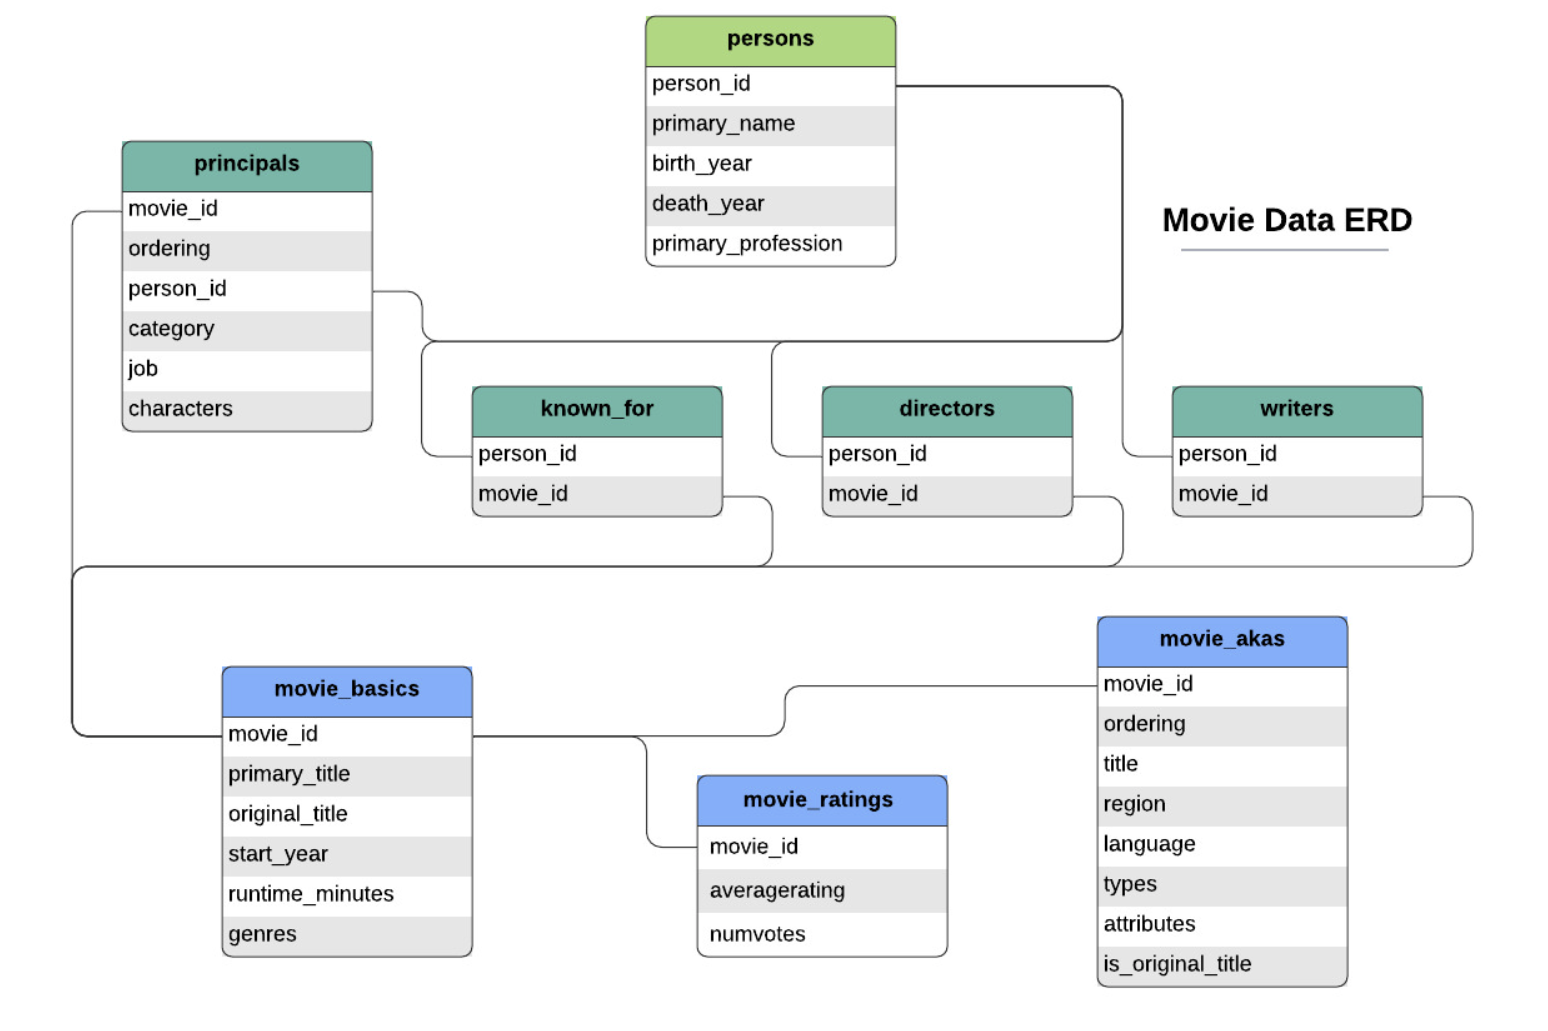

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick

In [2]:
# Connect these


# movie_basics: df_a
# movie_id (key)
# primary_title
# runtime_minutes
# genres

# directors: df_b
# movie_id (key)
# person_id
# movie_id

# Persons: df_e
# person_id (key)
# primary_name
# death_year (exclude those who have died)

# pd.read_csv('zippedData/tn.movie_budgets.csv.gz'):
# movie (key) -- Clean the heck out of it
# production_budget
# domestic_gross
# worldwide_gross

In [3]:
conn = sqlite3.connect('data/im.db')

In [4]:
cur = conn.cursor()

In [5]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

In [6]:
table_names = cur.fetchall()

In [7]:
for name in table_names:
    print(name[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers
movie_budge_table
movie_gross_table
title
movie_budgets_table


In [8]:
conn.close()

In [9]:
conn = sqlite3.connect('data/im.db')

In [10]:
a = """
SELECT DISTINCT
*
FROM movie_basics
ORDER BY movie_id

"""

b = """
SELECT *
FROM directors

"""

c = """
SELECT *
FROM known_for

"""


d = """
SELECT *
FROM movie_akas

"""


e = """
SELECT *
FROM movie_ratings

"""



f = """
SELECT *
FROM persons

"""


g = """
SELECT *
FROM principals

"""


h = """
SELECT *
FROM writers

"""


In [11]:
df_a = pd.read_sql(a,conn)

df_b = pd.read_sql(b,conn)

df_c = pd.read_sql(c,conn)

df_d = pd.read_sql(d,conn)

df_e = pd.read_sql(e,conn)

df_f = pd.read_sql(f,conn)

df_g = pd.read_sql(g,conn)

df_h = pd.read_sql(h,conn)

In [12]:
df_a.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
df_b.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [14]:
df_c.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [15]:
d = """
SELECT *
FROM movie_akas
WHERE attributes <> 'None'
"""

df_d = pd.read_sql(d,conn)

In [16]:
df_d.head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
1,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
2,tt0369610,22,Jurassic World 3D,DE,None,None,3-D version,0.0
3,tt0369610,23,Jurassic World 3D,XWW,None,None,3-D version,0.0
4,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
5,tt0369610,35,Jurassic Park 4,TR,tr,None,informal alternative title,0.0
6,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
7,tt0369610,7,Mundo Jurásico,UY,None,None,3-D version,0.0
8,tt0369610,8,Jurassic World 3D,PL,None,None,3-D version,0.0
9,tt0401729,14,John Carter Maaveeran,IN,ta,None,dubbed version,0.0


In [17]:
df_e.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [18]:
df_f.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [19]:
df_g.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [20]:
df_h.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [21]:
df_check = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [22]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
df_check.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [25]:
pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='ISO-8859-1')

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [26]:
pd.read_csv('zippedData/tmdb.movies.csv.gz')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [27]:
pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [28]:
Budg_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [29]:
# Budg_df.to_sql('title', conn, if_exists='replace', index=False)

In [30]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',), ('movie_budge_table',), ('movie_gross_table',), ('title',), ('movie_budgets_table',)]


In [31]:


# Read the CSV file
movie_budge = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Create a connection to the SQLite database
conn = sqlite3.connect('data/im.db')

# Create a table from the movie_gross DataFrame
movie_budge.to_sql('movie_budgets_table', conn, if_exists='replace', index=False)


In [32]:
movie_budge

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [33]:
# Create a connection to the SQLite database
conn = sqlite3.connect('data/im.db')

# Define the SQL query to join the two tables
sql_query = '''
    SELECT DISTINCT
        per.person_id AS person_id,
        per.primary_name,
        per.birth_year,
        per.death_year,
        der.movie_id AS movie_id,
        mb.primary_title,
        mb.runtime_minutes,
        mb.genres,
        mr.averagerating,
        mr.numvotes,
        mb.start_year,
        1 as count
    FROM persons per
    LEFT JOIN directors der 
        ON per.person_id = der.person_id
    LEFT JOIN movie_basics mb
        ON mb.movie_id = der.movie_id
    
    LEFT JOIN movie_ratings mr
        ON mb.movie_id = mr.movie_id
    
    ORDER BY person_id
'''


# Execute the SQL query and fetch the results
results_db = pd.read_sql(sql_query, conn)

# Close the database connection
conn.close()

# Print the column names in the joined table
print(results_db.columns)

Index(['person_id', 'primary_name', 'birth_year', 'death_year', 'movie_id',
       'primary_title', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'start_year', 'count'],
      dtype='object')


In [34]:
results_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660930 entries, 0 to 660929
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   person_id        660930 non-null  object 
 1   primary_name     660930 non-null  object 
 2   birth_year       100043 non-null  float64
 3   death_year       7134 non-null    float64
 4   movie_id         163533 non-null  object 
 5   primary_title    163533 non-null  object 
 6   runtime_minutes  130938 non-null  float64
 7   genres           159789 non-null  object 
 8   averagerating    86030 non-null   float64
 9   numvotes         86030 non-null   float64
 10  start_year       163533 non-null  float64
 11  count            660930 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 60.5+ MB


In [35]:
results_db['primary_title_j'] = results_db['primary_title'].str.strip().str.lower()

In [36]:
movie_budge['movie_j'] = movie_budge['movie'].str.strip().str.lower()

In [37]:
merged_df = pd.merge(results_db, movie_budge, left_on='primary_title_j', right_on='movie_j', how='left', suffixes=('_resu', '_budg'))

In [38]:
merged_df.dropna(subset=['movie_id', 'movie','runtime_minutes','averagerating' ], inplace=True)

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 44 to 655588
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   person_id          3118 non-null   object 
 1   primary_name       3118 non-null   object 
 2   birth_year         1712 non-null   float64
 3   death_year         25 non-null     float64
 4   movie_id           3118 non-null   object 
 5   primary_title      3118 non-null   object 
 6   runtime_minutes    3118 non-null   float64
 7   genres             3114 non-null   object 
 8   averagerating      3118 non-null   float64
 9   numvotes           3118 non-null   float64
 10  start_year         3118 non-null   float64
 11  count              3118 non-null   int64  
 12  primary_title_j    3118 non-null   object 
 13  id                 3118 non-null   float64
 14  release_date       3118 non-null   object 
 15  movie              3118 non-null   object 
 16  production_budget  31

In [40]:
merged_df.sort_values(by='movie_id')

,person_id,primary_name,birth_year,death_year,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,start_year,count,primary_title_j,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_j
42453,nm0440415,Lawrence Kasanoff,1959.0,NaN,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248.0,2012.0,1,foodfight!,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",foodfight!
129701,nm1208371,Jed I. Goodman,NaN,NaN,tt0326592,The Overnight,88.0,None,7.5,24.0,2010.0,1,the overnight,21.0,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",the overnight
68545,nm0758574,Walter Salles,1956.0,NaN,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886.0,2012.0,1,on the road,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",on the road
1734,nm0001774,Ben Stiller,1965.0,NaN,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,2013.0,1,the secret life of walter mitty,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",the secret life of walter mitty
29850,nm0291082,Scott Frank,1960.0,NaN,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,2014.0,1,a walk among the tombstones,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",a walk among the tombstones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432635,nm5603271,Taras Khymych,NaN,NaN,tt9684016,Alive,95.0,"Adventure,Biography,Drama",7.1,15.0,2016.0,1,alive,2.0,"Jan 15, 1993",Alive,"$32,000,000","$36,299,670","$36,299,670",alive
31937,nm0315430,Nikolaus Geyrhalter,1972.0,NaN,tt9746500,Earth,115.0,Documentary,7.3,49.0,2019.0,1,earth,36.0,"Apr 22, 2009",Earth,"$47,000,000","$32,011,576","$116,773,317",earth
644773,nm9607013,Ramazan Özer,NaN,NaN,tt9861522,Ali,110.0,Drama,7.7,79.0,2019.0,1,ali,45.0,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966",ali
456010,nm5971240,Hatef Alimardani,NaN,NaN,tt9899880,Columbus,85.0,Comedy,5.8,5.0,2018.0,1,columbus,93.0,"Aug 4, 2017",Columbus,"$700,000","$1,017,107","$1,110,511",columbus


In [41]:
merged_df['production_budget'] = merged_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
merged_df['domestic_gross'] = merged_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [42]:
# agg_funcs = {
#     'averagerating': 'mean',
#     'numvotes': 'sum',
#     'runtime_minutes': 'mean',
#     'start_year': 'max',
#     'birth_year': 'max',
#     'death_year': 'max',
#     'primary_name': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
#      'genres': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
#     'count': 'sum',
#     'production_budget': 'mean',
#     'domestic_gross': 'mean',
#     'worldwide_gross': 'mean',
     
# }

# # Group by 'primary_title' and apply aggregation functions
# movie_agg = merged_df.groupby('primary_title').agg(agg_funcs)

In [43]:
# agg_funcs = {
#     'averagerating': 'mean',
#     'numvotes': 'sum',
#     'runtime_minutes': 'mean',
#     'start_year': 'max',
#     'birth_year': 'max',
#     'death_year': 'max',
#     'primary_name': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
#      'genres': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
#     'count': 'sum',
#     'production_budget': 'median',
#     'domestic_gross': 'median',
#     'worldwide_gross': 'median',
     
# }

# # Group by 'primary_title' and apply aggregation functions
# movie_agg = merged_df.groupby('primary_title').agg(agg_funcs)

In [44]:
agg_funcs = {
    'averagerating': 'mean',
    'numvotes': 'sum',
    'runtime_minutes': 'mean',
    'start_year': 'max',
    'birth_year': 'max',
    'death_year': 'max',
    'primary_name': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
     'genres': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
    'count': 'sum',
    'production_budget': 'mean',
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean',
     
}

# Group by 'primary_title' and apply aggregation functions
movie_agg = merged_df.groupby('primary_title').agg(agg_funcs)

In [45]:
print(merged_df.dtypes)

person_id             object
primary_name          object
birth_year           float64
death_year           float64
movie_id              object
primary_title         object
runtime_minutes      float64
genres                object
averagerating        float64
numvotes             float64
start_year           float64
count                  int64
primary_title_j       object
id                   float64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
movie_j               object
dtype: object


In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 44 to 655588
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   person_id          3118 non-null   object 
 1   primary_name       3118 non-null   object 
 2   birth_year         1712 non-null   float64
 3   death_year         25 non-null     float64
 4   movie_id           3118 non-null   object 
 5   primary_title      3118 non-null   object 
 6   runtime_minutes    3118 non-null   float64
 7   genres             3114 non-null   object 
 8   averagerating      3118 non-null   float64
 9   numvotes           3118 non-null   float64
 10  start_year         3118 non-null   float64
 11  count              3118 non-null   int64  
 12  primary_title_j    3118 non-null   object 
 13  id                 3118 non-null   float64
 14  release_date       3118 non-null   object 
 15  movie              3118 non-null   object 
 16  production_budget  31

In [47]:
movie_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2147 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   averagerating      2147 non-null   float64
 1   numvotes           2147 non-null   float64
 2   runtime_minutes    2147 non-null   float64
 3   start_year         2147 non-null   float64
 4   birth_year         1462 non-null   float64
 5   death_year         23 non-null     float64
 6   primary_name       2147 non-null   object 
 7   genres             2147 non-null   object 
 8   count              2147 non-null   int64  
 9   production_budget  2147 non-null   float64
 10  domestic_gross     2147 non-null   float64
 11  worldwide_gross    2147 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 218.1+ KB


In [48]:
movie_agg.isnull().sum()

averagerating           0
numvotes                0
runtime_minutes         0
start_year              0
birth_year            685
death_year           2124
primary_name            0
genres                  0
count                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
dtype: int64

In [49]:
movie_agg = movie_agg.reset_index()

In [50]:
# movie_agg['return_perc'] = ((movie_agg['worldwide_gross'] - movie_agg['production_budget']) /movie_agg['production_budget'] - 1 ) *100


In [51]:
movie_agg['return_perc'] = ((movie_agg['worldwide_gross']) /movie_agg['production_budget'] - 1 ) *100


In [52]:
movie_agg['return_percv2'] = ((movie_agg['worldwide_gross'] - movie_agg['production_budget']) /movie_agg['production_budget'])


In [53]:
# movie_agg['return_percv2'] = ((movie_agg['worldwide_gross']) /movie_agg['production_budget'] - 1 ) *100


In [54]:
movie_agg['Action'] = 0
movie_agg['Adventure'] = 0
movie_agg['Animation'] = 0
movie_agg['Biography'] = 0
movie_agg['Comedy'] = 0
movie_agg['Crime'] = 0
movie_agg['Documentary'] = 0
movie_agg['Drama'] = 0
movie_agg['Family'] = 0
movie_agg['Fantasy'] = 0
movie_agg['History'] = 0
movie_agg['Horror'] = 0
movie_agg['Music'] = 0
movie_agg['Mystery'] = 0
movie_agg['Romance'] = 0
movie_agg['Sci-Fi'] = 0
movie_agg['Sport'] = 0
movie_agg['Thriller'] = 0


In [55]:
movie_agg.loc[movie_agg['genres'].str.contains('Action'), 'Action'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Adventure'), 'Adventure'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Animation'), 'Animation'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Biography'), 'Biography'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Comedy'), 'Comedy'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Crime'), 'Crime'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Documentary'), 'Documentary'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Drama'), 'Drama'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Family'), 'Family'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Fantasy'), 'Fantasy'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('History'), 'History'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Horror'), 'Horror'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Music'), 'Music'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Mystery'), 'Mystery'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Romance'), 'Romance'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Sci-Fi'), 'Sci-Fi'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Sport'), 'Sport'] = 1
movie_agg.loc[movie_agg['genres'].str.contains('Thriller'), 'Thriller'] = 1


In [56]:
movie_agg.head(20)

,primary_title,averagerating,numvotes,runtime_minutes,start_year,birth_year,death_year,primary_name,genres,count,...,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller
0,#Horror,3.000,3092.0,101.00,2015.0,1972.0,NaN,Tara Subkoff,"Crime,Drama,Horror",1,...,0,0,0,1,0,0,0,0,0,0
1,10 Cloverfield Lane,7.200,260383.0,103.00,2016.0,NaN,NaN,Dan Trachtenberg,"Drama,Horror,Mystery",1,...,0,0,0,1,0,1,0,0,0,0
2,10 Days in a Madhouse,6.700,1114.0,111.00,2015.0,1960.0,NaN,Timothy Hines,Drama,1,...,0,0,0,0,0,0,0,0,0,0
3,12 Strong,6.600,50155.0,130.00,2018.0,1972.0,NaN,Nicolai Fuglsig,"Action,Drama,History",1,...,0,0,1,0,0,0,0,0,0,0
4,12 Years a Slave,8.100,577301.0,134.00,2013.0,1969.0,NaN,Steve McQueen,"Biography,Drama,History",1,...,0,0,1,0,0,0,0,0,0,0
5,127 Hours,7.600,323949.0,94.00,2010.0,1956.0,NaN,Danny Boyle,"Adventure,Biography,Drama",1,...,0,0,0,0,0,0,0,0,0,0
6,13 Sins,6.300,29550.0,93.00,2014.0,1976.0,NaN,Daniel Stamm,"Horror,Thriller",1,...,0,0,0,1,0,0,0,0,0,1
7,1982,7.000,221.0,90.00,2013.0,NaN,NaN,Tommy Oliver,Drama,1,...,0,0,0,0,0,0,0,0,0,0
8,2 Guns,6.700,182025.0,109.00,2013.0,1966.0,NaN,Baltasar Kormákur,"Action,Comedy,Crime",1,...,0,0,0,0,0,0,0,0,0,0
9,20 Feet from Stardom,7.400,11312.0,91.00,2013.0,1967.0,NaN,Morgan Neville,"Documentary,Music",1,...,0,0,0,0,1,0,0,0,0,0


In [57]:
movie_agg.to_csv('joined_data.csv', index=False)

In [58]:
print(movie_agg['runtime_minutes'].quantile(q=[0.25, 0.5, 0.75]))

0.25     92.00
0.50    101.00
0.75    113.75
Name: runtime_minutes, dtype: float64


In [59]:
movie_agg['runtime_minutes'].dtype

dtype('float64')

In [60]:
print(
    'Mean =', movie_agg['runtime_minutes'].mean(), '\n',
      'Median =', movie_agg['runtime_minutes'].median(), '\n',
      'Min =', movie_agg['runtime_minutes'].min(), '\n',
      'Max =', movie_agg['runtime_minutes'].max(), '\n',
      'Std =', movie_agg['runtime_minutes'].std(), '\n')


Mean = 103.89714032668154 
 Median = 101.0 
 Min = 5.0 
 Max = 180.0 
 Std = 18.212512698258216 



In [61]:
# Define the bins and labels for the time buckets
bins = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210]
labels = [f"{i+1} to {i+15}" for i in range(0, 195, 15)]

# Use pd.cut() to assign each value in the runtime_minutes column to a time bucket
movie_agg['time_bucket'] = pd.cut(movie_agg['runtime_minutes'], bins=bins[:-1], labels=labels)


In [62]:
movie_agg.head()

,primary_title,averagerating,numvotes,runtime_minutes,start_year,birth_year,death_year,primary_name,genres,count,...,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,time_bucket
0,#Horror,3.0,3092.0,101.0,2015.0,1972.0,NaN,Tara Subkoff,"Crime,Drama,Horror",1,...,0,0,1,0,0,0,0,0,0,91 to 105
1,10 Cloverfield Lane,7.2,260383.0,103.0,2016.0,NaN,NaN,Dan Trachtenberg,"Drama,Horror,Mystery",1,...,0,0,1,0,1,0,0,0,0,91 to 105
2,10 Days in a Madhouse,6.7,1114.0,111.0,2015.0,1960.0,NaN,Timothy Hines,Drama,1,...,0,0,0,0,0,0,0,0,0,106 to 120
3,12 Strong,6.6,50155.0,130.0,2018.0,1972.0,NaN,Nicolai Fuglsig,"Action,Drama,History",1,...,0,1,0,0,0,0,0,0,0,121 to 135
4,12 Years a Slave,8.1,577301.0,134.0,2013.0,1969.0,NaN,Steve McQueen,"Biography,Drama,History",1,...,0,1,0,0,0,0,0,0,0,121 to 135


In [63]:
# mean_return_perc = movie_agg.groupby('time_bucket')['return_perc'].mean()

In [64]:
mean_return_perc = movie_agg.groupby('time_bucket')['return_perc'].median()

In [65]:
mean_return_perc_total = movie_agg['return_perc'].median()

In [66]:
mean_return_perc.head(20)

time_bucket
1 to 15       169.867651
16 to 30             NaN
31 to 45      353.235213
46 to 60      128.173563
61 to 75        0.077556
76 to 90      -16.715668
91 to 105      65.886095
106 to 120     81.871472
121 to 135    137.044727
136 to 150    211.799976
151 to 165    161.187858
166 to 180    296.868351
181 to 195           NaN
Name: return_perc, dtype: float64

In [67]:
mean_return_perc.index = mean_return_perc.index.astype(str)
mean_return_perc_total = pd.Series(mean_return_perc_total, name='All')
mean_return_perc = mean_return_perc.append(mean_return_perc_total)

In [68]:
mean_return_perc = mean_return_perc.rename(index={0: 'Data Set'})

In [69]:
mean_return_perc = mean_return_perc.reindex(['Data Set'] + [f'{i} to {i+14}' for i in range(1, 181, 15)])

In [70]:
mean_return_perc.head(40)

Data Set       70.936470
1 to 15       169.867651
16 to 30             NaN
31 to 45      353.235213
46 to 60      128.173563
61 to 75        0.077556
76 to 90      -16.715668
91 to 105      65.886095
106 to 120     81.871472
121 to 135    137.044727
136 to 150    211.799976
151 to 165    161.187858
166 to 180    296.868351
dtype: float64

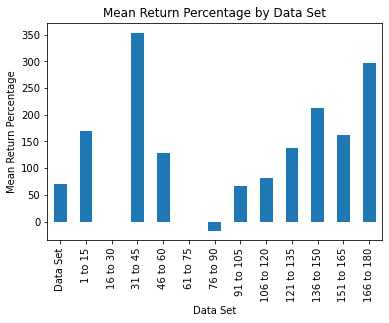

In [71]:
# create the bar graph
mean_return_perc.plot.bar()

# set the title and axis labels
plt.title('Mean Return Percentage by Data Set')
plt.xlabel('Data Set')
plt.ylabel('Mean Return Percentage')

# show the plot
plt.show()

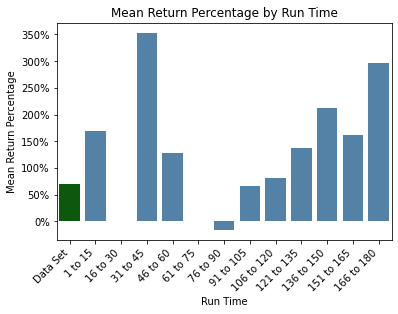

In [72]:
# Create a list of colors for each bar in the plot
colors = ['darkgreen' if g == 'Data Set' else 'steelblue' for g in mean_return_perc.index]

# Create a bar graph of the mean values for each data set using Seaborn
ax = sns.barplot(x=mean_return_perc.index, y=mean_return_perc.values, palette=colors)

# Set the y-axis tick labels as percentages
def to_percent(x, pos):
    return '{:.0%}'.format(x/100)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(to_percent))

# Set the x- and y-axis labels and title
ax.set_xlabel('Run Time')
ax.set_ylabel('Mean Return Percentage')
ax.set_title('Mean Return Percentage by Run Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [73]:
mean_return_perc = mean_return_perc.dropna()

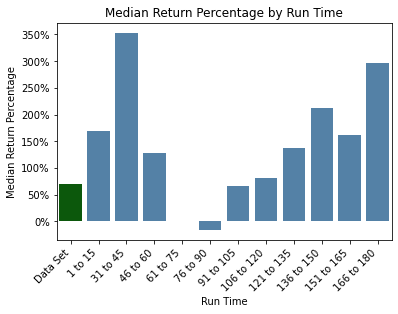

In [74]:
# Create a list of colors for each bar in the plot
colors = ['darkgreen' if g == 'Data Set' else 'steelblue' for g in mean_return_perc.index]

# Create a bar graph of the mean values for each data set using Seaborn
ax = sns.barplot(x=mean_return_perc.index, y=mean_return_perc.values, palette=colors)

# Set the y-axis tick labels as percentages
def to_percent(x, pos):
    return '{:.0%}'.format(x/100)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(to_percent))

# Set the x- and y-axis labels and title
ax.set_xlabel('Run Time')
ax.set_ylabel('Median Return Percentage')
ax.set_title('Median Return Percentage by Run Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [110]:
mean_return_perc

Data Set       70.936470
1 to 15       169.867651
31 to 45      353.235213
46 to 60      128.173563
61 to 75        0.077556
76 to 90      -16.715668
91 to 105      65.886095
106 to 120     81.871472
121 to 135    137.044727
136 to 150    211.799976
151 to 165    161.187858
166 to 180    296.868351
dtype: float64

In [ ]:
# Create a list of colors for each bar in the plot
colors = ['darkgreen' if g == 'Data Set' else 'steelblue' for g in mean_return_perc.index]

# Create a bar graph of the mean values for each data set using Seaborn
ax = sns.barplot(x=mean_return_perc.index, y=mean_return_perc.values, palette=colors)

# Set the y-axis tick labels as percentages
def to_percent(x, pos):
    return '{:.0%}'.format(x/100)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(to_percent))

# Set the x- and y-axis labels and title
ax.set_xlabel('Run Time')
ax.set_ylabel('Median Return Percentage')
ax.set_title('Median Return Percentage by Run Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [75]:
# Data_mean = movie_agg.loc[movie_agg['Action'] >= 0, 'return_perc'].mean()
# Action_mean = movie_agg.loc[movie_agg['Action'] == 1, 'return_perc'].mean()
# Adventure_mean = movie_agg.loc[movie_agg['Adventure'] == 1, 'return_perc'].mean()
# Animation_mean = movie_agg.loc[movie_agg['Animation'] == 1, 'return_perc'].mean()
# Biography_mean = movie_agg.loc[movie_agg['Biography'] == 1, 'return_perc'].mean()
# Comedy_mean = movie_agg.loc[movie_agg['Comedy'] == 1, 'return_perc'].mean()
# Crime_mean = movie_agg.loc[movie_agg['Crime'] == 1, 'return_perc'].mean()
# Documentary_mean = movie_agg.loc[movie_agg['Documentary'] == 1, 'return_perc'].mean()
# Drama_mean = movie_agg.loc[movie_agg['Drama'] == 1, 'return_perc'].mean()
# Family_mean = movie_agg.loc[movie_agg['Family'] == 1, 'return_perc'].mean()
# Fantasy_mean = movie_agg.loc[movie_agg['Fantasy'] == 1, 'return_perc'].mean()
# History_mean = movie_agg.loc[movie_agg['History'] == 1, 'return_perc'].mean()
# Horror_mean = movie_agg.loc[movie_agg['Horror'] == 1, 'return_perc'].mean()
# Music_mean = movie_agg.loc[movie_agg['Music'] == 1, 'return_perc'].mean()
# Mystery_mean = movie_agg.loc[movie_agg['Mystery'] == 1, 'return_perc'].mean()
# Romance_mean = movie_agg.loc[movie_agg['Romance'] == 1, 'return_perc'].mean()
# SciFi_mean = movie_agg.loc[movie_agg['Sci-Fi'] == 1, 'return_perc'].mean()
# Sport_mean = movie_agg.loc[movie_agg['Sport'] == 1, 'return_perc'].mean()
# Thriller_mean = movie_agg.loc[movie_agg['Thriller'] == 1, 'return_perc'].mean()


In [76]:
Data_mean = movie_agg.loc[movie_agg['Action'] >= 0, 'return_perc'].median()
Action_mean = movie_agg.loc[movie_agg['Action'] == 1, 'return_perc'].median()
Adventure_mean = movie_agg.loc[movie_agg['Adventure'] == 1, 'return_perc'].median()
Animation_mean = movie_agg.loc[movie_agg['Animation'] == 1, 'return_perc'].median()
Biography_mean = movie_agg.loc[movie_agg['Biography'] == 1, 'return_perc'].median()
Comedy_mean = movie_agg.loc[movie_agg['Comedy'] == 1, 'return_perc'].median()
Crime_mean = movie_agg.loc[movie_agg['Crime'] == 1, 'return_perc'].median()
Documentary_mean = movie_agg.loc[movie_agg['Documentary'] == 1, 'return_perc'].median()
Drama_mean = movie_agg.loc[movie_agg['Drama'] == 1, 'return_perc'].median()
Family_mean = movie_agg.loc[movie_agg['Family'] == 1, 'return_perc'].median()
Fantasy_mean = movie_agg.loc[movie_agg['Fantasy'] == 1, 'return_perc'].median()
History_mean = movie_agg.loc[movie_agg['History'] == 1, 'return_perc'].median()
Horror_mean = movie_agg.loc[movie_agg['Horror'] == 1, 'return_perc'].median()
Music_mean = movie_agg.loc[movie_agg['Music'] == 1, 'return_perc'].median()
Mystery_mean = movie_agg.loc[movie_agg['Mystery'] == 1, 'return_perc'].median()
Romance_mean = movie_agg.loc[movie_agg['Romance'] == 1, 'return_perc'].median()
SciFi_mean = movie_agg.loc[movie_agg['Sci-Fi'] == 1, 'return_perc'].median()
Sport_mean = movie_agg.loc[movie_agg['Sport'] == 1, 'return_perc'].median()
Thriller_mean = movie_agg.loc[movie_agg['Thriller'] == 1, 'return_perc'].median()


In [77]:
print(f"Data_mean: {Data_mean}\n"
      f"Action_mean: {Action_mean}\n"
      f"Adventure_mean: {Adventure_mean}\n"
      f"Animation_mean: {Animation_mean}\n"
      f"Biography_mean: {Biography_mean}\n"
      f"Comedy_mean: {Comedy_mean}\n"
      f"Crime_mean: {Crime_mean}\n"
      f"Documentary_mean: {Documentary_mean}\n"
      f"Drama_mean: {Drama_mean}\n"
      f"Family_mean: {Family_mean}\n"
      f"Fantasy_mean: {Fantasy_mean}\n"
      f"History_mean: {History_mean}\n"
      f"Horror_mean: {Horror_mean}\n"
      f"Music_mean: {Music_mean}\n"
      f"Mystery_mean: {Mystery_mean}\n"
      f"Romance_mean: {Romance_mean}\n"
      f"Sci-Fi_mean: {SciFi_mean}\n"
      f"Sport_mean: {Sport_mean}\n"
      f"Thriller_mean: {Thriller_mean}")


Data_mean: 70.93647000000001
Action_mean: 91.95070168470419
Adventure_mean: 137.2408366666667
Animation_mean: 176.28114026666665
Biography_mean: 59.77979733333333
Comedy_mean: 104.54080264705883
Crime_mean: 31.176704142857147
Documentary_mean: 30.520308771929827
Drama_mean: 40.772594256756754
Family_mean: 87.15965285714287
Fantasy_mean: 100.03138150000001
History_mean: 13.602859999999994
Horror_mean: 50.37867
Music_mean: 47.2944705882353
Mystery_mean: 107.57487499999998
Romance_mean: 86.21205313664595
Sci-Fi_mean: 125.84368888888888
Sport_mean: 19.389919999999993
Thriller_mean: 43.99413777777779


In [78]:
genre_means = pd.DataFrame({
    'Genre': ['Data Set', 'Action', 'Adventure', 'Animation', 'Biography',
              'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
              'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi',
              'Sport', 'Thriller'],
    'mean_ROI': [Data_mean, Action_mean, Adventure_mean, Animation_mean, Biography_mean,
                         Comedy_mean, Crime_mean, Documentary_mean, Drama_mean, Family_mean,
                         Fantasy_mean, History_mean, Horror_mean, Music_mean, Mystery_mean,
                         Romance_mean, SciFi_mean, Sport_mean, Thriller_mean]
})

print(genre_means)

          Genre    mean_ROI
0      Data Set   70.936470
1        Action   91.950702
2     Adventure  137.240837
3     Animation  176.281140
4     Biography   59.779797
5        Comedy  104.540803
6         Crime   31.176704
7   Documentary   30.520309
8         Drama   40.772594
9        Family   87.159653
10      Fantasy  100.031382
11      History   13.602860
12       Horror   50.378670
13        Music   47.294471
14      Mystery  107.574875
15      Romance   86.212053
16       Sci-Fi  125.843689
17        Sport   19.389920
18     Thriller   43.994138


<AxesSubplot:xlabel='Genre'>

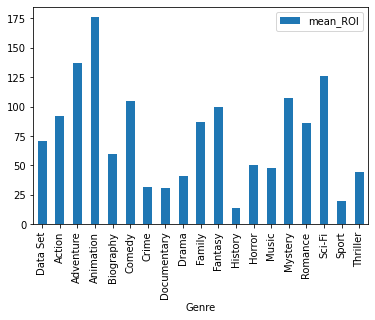

In [79]:
genre_means.plot.bar(x='Genre', y='mean_ROI')

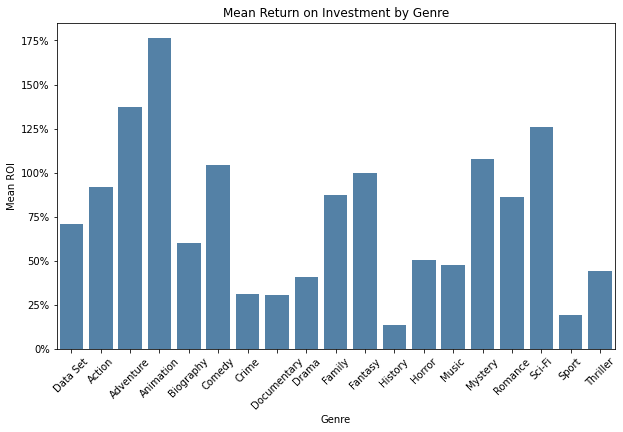

In [80]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar graph of the mean values for each genre using Seaborn
ax = sns.barplot(x='Genre', y='mean_ROI', data=genre_means, color='steelblue')

# Set the y-axis tick labels as percentages
def to_percent(x, pos):
    return '{:.0%}'.format(x/100)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(to_percent))

# Set the x- and y-axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Mean ROI')
ax.set_title('Mean Return on Investment by Genre')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

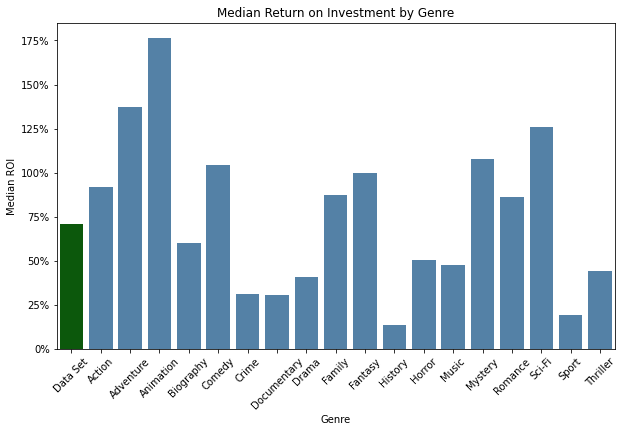

In [81]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a list of colors for each bar in the plot
colors = ['darkgreen' if g == 'Data Set' else 'steelblue' for g in genre_means['Genre']]

# Create a bar graph of the mean values for each genre using Seaborn
ax = sns.barplot(x='Genre', y='mean_ROI', data=genre_means, palette=colors)

# Set the y-axis tick labels as percentages
def to_percent(x, pos):
    return '{:.0%}'.format(x/100)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(to_percent))

# Set the x- and y-axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Median ROI')
ax.set_title('Median Return on Investment by Genre')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [82]:
movie_agg.head()

,primary_title,averagerating,numvotes,runtime_minutes,start_year,birth_year,death_year,primary_name,genres,count,...,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,time_bucket
0,#Horror,3.0,3092.0,101.0,2015.0,1972.0,NaN,Tara Subkoff,"Crime,Drama,Horror",1,...,0,0,1,0,0,0,0,0,0,91 to 105
1,10 Cloverfield Lane,7.2,260383.0,103.0,2016.0,NaN,NaN,Dan Trachtenberg,"Drama,Horror,Mystery",1,...,0,0,1,0,1,0,0,0,0,91 to 105
2,10 Days in a Madhouse,6.7,1114.0,111.0,2015.0,1960.0,NaN,Timothy Hines,Drama,1,...,0,0,0,0,0,0,0,0,0,106 to 120
3,12 Strong,6.6,50155.0,130.0,2018.0,1972.0,NaN,Nicolai Fuglsig,"Action,Drama,History",1,...,0,1,0,0,0,0,0,0,0,121 to 135
4,12 Years a Slave,8.1,577301.0,134.0,2013.0,1969.0,NaN,Steve McQueen,"Biography,Drama,History",1,...,0,1,0,0,0,0,0,0,0,121 to 135


In [83]:
agg_funcs2 = {
    'averagerating': 'mean',
    'numvotes': 'sum',
    'runtime_minutes': 'mean',
    'start_year': 'max',
    'birth_year': 'max',
    'death_year': 'max',
    'primary_title': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
     'genres': lambda x: ', '.join([str(i).strip().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
    'count': 'sum',
    'production_budget': 'median',
    'domestic_gross': 'median',
    'worldwide_gross': 'median',
     
}

# Group by 'primary_title' and apply aggregation functions
dir_agg = merged_df.groupby('primary_name').agg(agg_funcs2)

In [84]:
dir_agg

,averagerating,numvotes,runtime_minutes,start_year,birth_year,death_year,primary_title,genres,count,production_budget,domestic_gross,worldwide_gross
primary_name,,,,,,,,,,,,
Aaron Alon,7.9,9.0,58.0,2017.0,NaN,NaN,Bully,"Drama,Musical",1,2100000.0,881824.0,1381824.0
Aaron Hann,6.0,30645.0,87.0,2015.0,NaN,NaN,Circle,"Drama,Mystery,Sci-Fi",1,2000000.0,10024.0,10024.0
Aaron Horvath,6.8,12525.0,84.0,2018.0,1980.0,NaN,Teen Titans Go! To the Movies,"Action,Animation,Comedy",1,10000000.0,29790236.0,51620593.0
Aaron Seltzer,3.4,43984.0,82.0,2010.0,1974.0,NaN,Vampires Suck,Comedy,1,20000000.0,36661504.0,81424988.0
Aaron T. Wells,3.5,2230.0,104.0,2012.0,NaN,NaN,Girls Gone Dead,"Comedy,Horror",1,500000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zhigang Yang,7.1,581.0,93.0,2017.0,NaN,NaN,The Guardian,"Action,Animation,Fantasy",1,70000000.0,55011732.0,94973540.0
Zhijian Tong,6.2,13.0,90.0,2014.0,NaN,NaN,One Day,Family,1,15000000.0,13843771.0,59168692.0
Zoran Lisinac,6.8,392.0,108.0,2013.0,NaN,NaN,Along the Roadside,"Comedy,Music,Romance",1,250000.0,0.0,3234.0


In [85]:
dir_agg['Action'] = 0
dir_agg['Adventure'] = 0
dir_agg['Animation'] = 0
dir_agg['Biography'] = 0
dir_agg['Comedy'] = 0
dir_agg['Crime'] = 0
dir_agg['Documentary'] = 0
dir_agg['Drama'] = 0
dir_agg['Family'] = 0
dir_agg['Fantasy'] = 0
dir_agg['History'] = 0
dir_agg['Horror'] = 0
dir_agg['Music'] = 0
dir_agg['Mystery'] = 0
dir_agg['Romance'] = 0
dir_agg['Sci-Fi'] = 0
dir_agg['Sport'] = 0
dir_agg['Thriller'] = 0




In [86]:
dir_agg.loc[dir_agg['genres'].str.contains('Action'), 'Action'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Adventure'), 'Adventure'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Animation'), 'Animation'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Biography'), 'Biography'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Comedy'), 'Comedy'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Crime'), 'Crime'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Documentary'), 'Documentary'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Drama'), 'Drama'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Family'), 'Family'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Fantasy'), 'Fantasy'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('History'), 'History'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Horror'), 'Horror'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Music'), 'Music'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Mystery'), 'Mystery'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Romance'), 'Romance'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Sci-Fi'), 'Sci-Fi'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Sport'), 'Sport'] = 1
dir_agg.loc[dir_agg['genres'].str.contains('Thriller'), 'Thriller'] = 1

In [87]:
dir_agg['return_perc'] = ((dir_agg['worldwide_gross']) /dir_agg['production_budget'] - 1 ) *100

In [88]:
dir_agg = dir_agg.reset_index()

In [89]:
dir_agg

,primary_name,averagerating,numvotes,runtime_minutes,start_year,birth_year,death_year,primary_title,genres,count,...,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,return_perc
0,Aaron Alon,7.9,9.0,58.0,2017.0,NaN,NaN,Bully,"Drama,Musical",1,...,0,0,0,1,0,0,0,0,0,-34.198857
1,Aaron Hann,6.0,30645.0,87.0,2015.0,NaN,NaN,Circle,"Drama,Mystery,Sci-Fi",1,...,0,0,0,0,1,0,1,0,0,-99.498800
2,Aaron Horvath,6.8,12525.0,84.0,2018.0,1980.0,NaN,Teen Titans Go! To the Movies,"Action,Animation,Comedy",1,...,0,0,0,0,0,0,0,0,0,416.205930
3,Aaron Seltzer,3.4,43984.0,82.0,2010.0,1974.0,NaN,Vampires Suck,Comedy,1,...,0,0,0,0,0,0,0,0,0,307.124940
4,Aaron T. Wells,3.5,2230.0,104.0,2012.0,NaN,NaN,Girls Gone Dead,"Comedy,Horror",1,...,0,0,1,0,0,0,0,0,0,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,Zhigang Yang,7.1,581.0,93.0,2017.0,NaN,NaN,The Guardian,"Action,Animation,Fantasy",1,...,1,0,0,0,0,0,0,0,0,35.676486
2320,Zhijian Tong,6.2,13.0,90.0,2014.0,NaN,NaN,One Day,Family,1,...,0,0,0,0,0,0,0,0,0,294.457947
2321,Zoran Lisinac,6.8,392.0,108.0,2013.0,NaN,NaN,Along the Roadside,"Comedy,Music,Romance",1,...,0,0,0,1,0,1,0,0,0,-98.706400
2322,Zsófia Szilágyi,7.2,501.0,99.0,2018.0,NaN,NaN,One Day,Drama,1,...,0,0,0,0,0,0,0,0,0,294.457947


In [90]:
dir_agg.to_csv('Dirjoined_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'Dirjoined_data.csv'

In [91]:
df_filtered = dir_agg[dir_agg['count'] >= 5]

In [92]:
df_filtered.sort_values('return_perc', ascending=False)

,primary_name,averagerating,numvotes,runtime_minutes,start_year,birth_year,death_year,primary_title,genres,count,...,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,return_perc
1318,M. Night Shyamalan,5.840000,914216.0,108.600000,2019.0,1970.0,NaN,"The Last Airbender, After Earth, The Visit, Sp...","Action,Adventure,Family, Action,Adventure,Dram...",5,...,0,0,1,0,1,0,1,0,1,1157.498325
1643,Paul Feig,6.140000,859916.0,118.200000,2018.0,1962.0,NaN,"Ghostbusters, Bridesmaids, The Heat, A Simple ...","Action,Comedy,Fantasy, Comedy,Romance, Action,...",5,...,1,0,0,0,0,1,0,0,0,606.854689
1061,Jon M. Chu,5.200000,613114.0,114.833333,2018.0,1979.0,NaN,"Step Up 3D, G.I. Joe: Retaliation, Justin Bieb...","Drama,Music,Romance, Action,Adventure,Sci-Fi, ...",6,...,0,0,0,1,0,1,1,0,0,573.314713
2131,Tim Story,6.371429,223888.0,98.428571,2016.0,1970.0,NaN,"Ride Along, Think Like a Man, Kevin Hart: Laug...","Action,Comedy,Crime, Comedy,Romance, Comedy,Do...",7,...,0,0,0,0,0,1,0,0,0,483.566108
1203,Kenneth Branagh,6.700000,1262364.0,108.800000,2017.0,1960.0,NaN,"Thor, Jack Ryan: Shadow Recruit, Cinderella, M...","Action,Adventure,Fantasy, Action,Drama,Thrille...",5,...,1,0,0,0,1,0,0,0,1,476.537883
698,Francis Lawrence,6.840000,1449439.0,133.200000,2018.0,1971.0,NaN,"Water for Elephants, The Hunger Games: Catchin...","Drama,Romance, Action,Adventure,Sci-Fi, Action...",5,...,0,0,0,0,0,1,1,0,1,419.189430
538,David O. Russell,6.680000,1480912.0,120.000000,2015.0,1958.0,NaN,"The Fighter, Silver Linings Playbook, Accident...","Biography,Drama,Sport, Comedy,Drama,Romance, C...",5,...,0,0,0,0,0,1,0,1,0,397.163031
788,Guy Ritchie,7.280000,918947.0,125.400000,2019.0,1968.0,NaN,"Sherlock Holmes: A Game of Shadows, The Man fr...","Action,Adventure,Crime, Action,Adventure,Comed...",5,...,0,0,0,0,0,0,0,0,0,303.240175
252,Brad Peyton,5.520000,415007.0,97.600000,2018.0,1978.0,NaN,"Cats & Dogs: The Revenge of Kitty Galore, Jour...","Action,Comedy,Family, Action,Adventure,Comedy,...",5,...,0,0,1,0,0,0,1,0,1,274.289602
1654,Paul W.S. Anderson,5.640000,552315.0,102.600000,2016.0,1965.0,NaN,"Resident Evil: Afterlife, The Three Musketeers...","Action,Adventure,Horror, Action,Adventure,Roma...",5,...,0,0,1,0,0,1,1,0,0,270.227122


In [93]:
df_filtered['return_perc'].median()

185.20954285714285

In [94]:
dir_return_perc = df_filtered.groupby('primary_name')['return_perc'].median()

In [95]:
dir_return_perc

primary_name
Antoine Fuqua          146.969897
Brad Peyton            274.289602
Clint Eastwood         117.320540
Danny Boyle             97.661150
David Ayer             -28.016743
David Gordon Green      74.144253
David O. Russell       397.163031
Denis Villeneuve       146.526743
Francis Lawrence       419.189430
Guy Ritchie            303.240175
Jaume Collet-Serra     175.936091
Jon M. Chu             573.314713
Jonathan Levine         74.757820
Kenneth Branagh        476.537883
M. Night Shyamalan    1157.498325
Mike Mitchell          247.626398
Nicholas Stoller       210.736060
Paul Feig              606.854689
Paul W.S. Anderson     270.227122
Peter Berg             206.509560
Peter Farrelly         190.578250
Ridley Scott           148.439364
Robert Rodriguez       103.254210
Ron Howard              30.974452
Shawn Levy             162.532816
Simon West             -48.663583
Steven Soderbergh       92.453352
Steven Spielberg       185.209543
Tim Burton              68.970083
T

In [96]:
dir_return_perc_total = dir_return_perc.median()

In [97]:
dir_return_perc_total

185.20954285714285

In [98]:
dir_return_perc = dir_return_perc.sort_values(ascending=False)

In [99]:
dir_return_perc['Data Set'] = dir_return_perc_total

In [100]:
dir_return_perc = pd.concat([pd.Series({'Data Set': dir_return_perc_total}), dir_return_perc.drop('Data Set')])

In [101]:
dir_return_perc

Data Set               185.209543
M. Night Shyamalan    1157.498325
Paul Feig              606.854689
Jon M. Chu             573.314713
Tim Story              483.566108
Kenneth Branagh        476.537883
Francis Lawrence       419.189430
David O. Russell       397.163031
Guy Ritchie            303.240175
Brad Peyton            274.289602
Paul W.S. Anderson     270.227122
Mike Mitchell          247.626398
Nicholas Stoller       210.736060
Peter Berg             206.509560
Zack Snyder            191.531204
Peter Farrelly         190.578250
Steven Spielberg       185.209543
Jaume Collet-Serra     175.936091
Shawn Levy             162.532816
Ridley Scott           148.439364
Antoine Fuqua          146.969897
Denis Villeneuve       146.526743
Clint Eastwood         117.320540
Robert Rodriguez       103.254210
Danny Boyle             97.661150
Steven Soderbergh       92.453352
Jonathan Levine         74.757820
David Gordon Green      74.144253
Tim Burton              68.970083
Ron Howard    

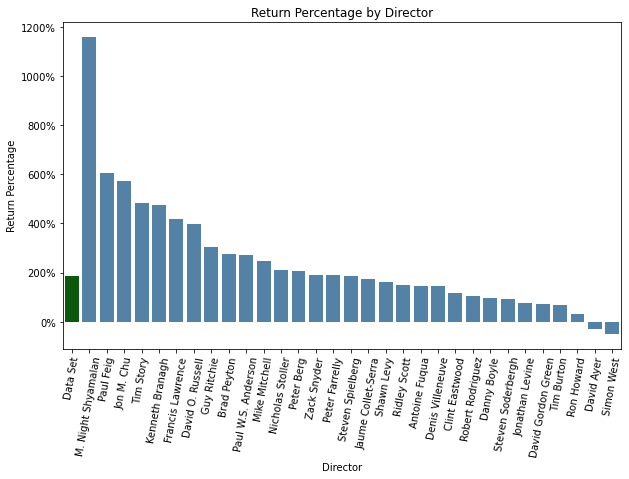

In [107]:
df = pd.DataFrame(dir_return_perc, columns=['return_perc'])

# Add primary_name as a column
df['primary_name'] = df.index

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a list of colors for each bar in the plot
colors = ['darkgreen' if g == 'Data Set' else 'steelblue' for g in df['primary_name']]

# Create a bar graph using Seaborn
ax = sns.barplot(x='primary_name', y='return_perc', data=df, palette=colors)

# Set the y-axis tick labels as percentages
def to_percent(x, pos):
    return '{:.0%}'.format(x/100)

ax.yaxis.set_major_formatter(plt.FuncFormatter(to_percent))

# Set the x- and y-axis labels and title
ax.set_xlabel('Director')
ax.set_ylabel('Return Percentage')
ax.set_title('Return Percentage by Director')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=80)

# Show the plot
plt.show()

In [108]:
dir_return_perc = dir_return_perc.sort_values(ascending=False)

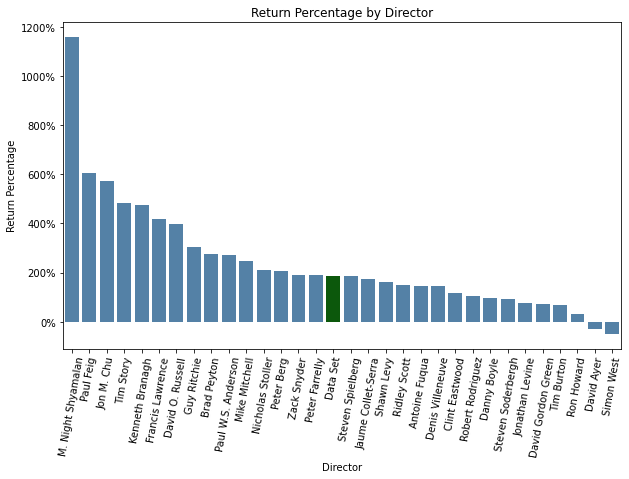

In [109]:
df = pd.DataFrame(dir_return_perc, columns=['return_perc'])

# Add primary_name as a column
df['primary_name'] = df.index

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a list of colors for each bar in the plot
colors = ['darkgreen' if g == 'Data Set' else 'steelblue' for g in df['primary_name']]

# Create a bar graph using Seaborn
ax = sns.barplot(x='primary_name', y='return_perc', data=df, palette=colors)

# Set the y-axis tick labels as percentages
def to_percent(x, pos):
    return '{:.0%}'.format(x/100)

ax.yaxis.set_major_formatter(plt.FuncFormatter(to_percent))

# Set the x- and y-axis labels and title
ax.set_xlabel('Director')
ax.set_ylabel('Return Percentage')
ax.set_title('Return Percentage by Director')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=80)

# Show the plot
plt.show()